Krista Miller
Data Visualization, Assignment 2

Assignment 2, Part 1: Create a list of the atomic weights of the first six elements of the periodic table, each rounded to the nearest integer. Provide two pie charts as follows: (1) each slice annotated with a percentage of the whole, and (2) each slice annotated with its atomic weight.  Explode a different element with each chart.

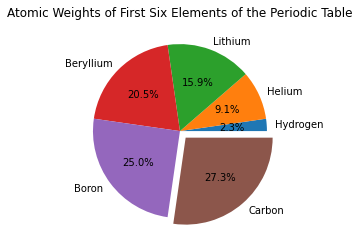

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('elements_assignment_2.csv')
df

explode= (0.0, 0.0, 0.0, 0.0, 0.0, 0.1)

plt.pie(df['AtomicMass'], labels= df['Name'], explode= explode,
        autopct='%1.1f%%')
plt.title('Atomic Weights of First Six Elements of the Periodic Table')
plt.show()



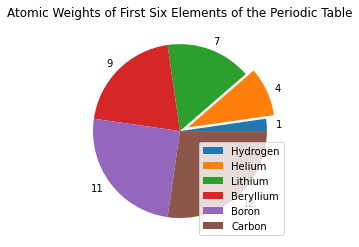

In [3]:
explode2= (0.0, 0.1, 0.0, 0.0, 0.0, 0.0)

plt.pie(df['AtomicMass'], labels= df['AtomicMass'], explode= explode2,
       autopct= None)
plt.title('Atomic Weights of First Six Elements of the Periodic Table')
plt.legend(df['Name'], loc=4)

plt.show()


Assignment 2, Part 2: Read into a DataFrame the file py_ide2.csv and provide both a horizontal bar chart and a vertical bar chart, complete with all labels. Be sure to rotate the IDE names so that they are readable.

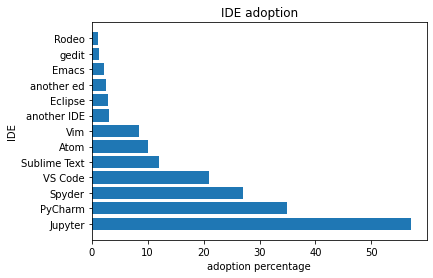

In [4]:
df2 = pd.read_csv('py_ide2.csv')

plt.barh(df2['IDE'],df2['Adoption'])
plt.title("IDE adoption")
plt.xlabel("adoption percentage")
plt.ylabel("IDE")
plt.show()

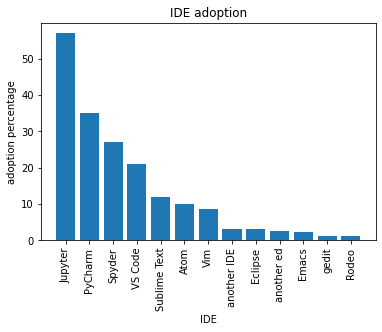

In [5]:
plt.bar(df2['IDE'],df2['Adoption'])
plt.title("IDE adoption")
plt.xlabel("IDE")
plt.ylabel("adoption percentage")
plt.xticks(rotation=90)
plt.show()

Assignment 2, Part 3: Construct a list of eight strings that represent days evenly spread out. Drawing from the random uniform distribution, make an array of eight floats ranging from 100 to 200 in value.  Establish a DataFrame from that list and that array, convert the dates to pandas datetime objects and set them to the index.  Make two charts in the same window or canvas as follows: (1) line plot of the values vs. dates, and (2) bar chart of the same.

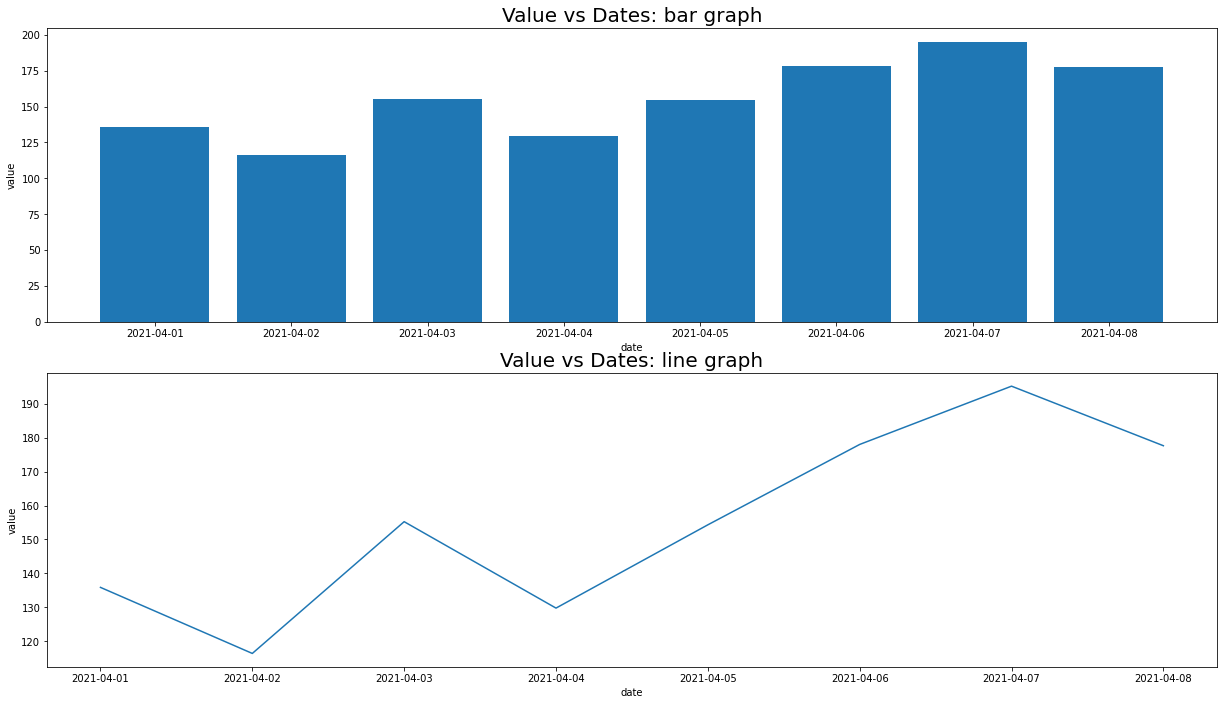

In [6]:
import datetime as dt
dates=['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08']
floats=np.random.uniform(low=100, high=200, size=8)
dates_list = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in dates]
df5= pd.DataFrame(floats, index=dates_list, columns=['Values'])

fig, (ax1, ax2) =plt.subplots(2, figsize=(17.5,10))
fig.tight_layout(pad=3.0)

plt.subplot(2,1,1)
value_bar= plt.bar(df5.index, df5['Values'])

plt.subplot(2,1,2)
value_line=plt.plot(df5.index, df5['Values'])

ax1.set_title("Value vs Dates: bar graph", size=20)
ax1.set(ylabel="value", xlabel="date")
ax2.set_title("Value vs Dates: line graph", size=20)
ax2.set(ylabel="value", xlabel="date")

plt.show()


Assignment 2, Part 4: Pull from Yahoo Finance the closing prices and volumes of the stock of your choice over the trading days of one month and plot the prices and volumes on a canvas in two separate panels, one above the other, with the dates aligned.

In [7]:
import pandas_datareader.data as web
import datetime

# define datetimes for start and end dates
start_date = datetime.date(2021, 8, 1)
end_date = datetime.date(2021, 8, 31)

# import stock data for given period between start and end date form yahoo finance
df4 = web.DataReader("AAL", "yahoo",start_date, end_date)
df4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-02,20.850000,19.990000,20.490000,20.059999,27151300,20.059999
2021-08-03,20.080000,19.309999,20.080000,19.950001,36572600,19.950001
2021-08-04,19.950001,19.350000,19.520000,19.450001,30815400,19.450001
2021-08-05,20.969999,19.450001,19.469999,20.910000,42900900,20.910000
2021-08-06,21.219999,20.520000,21.129999,21.020000,28256200,21.020000


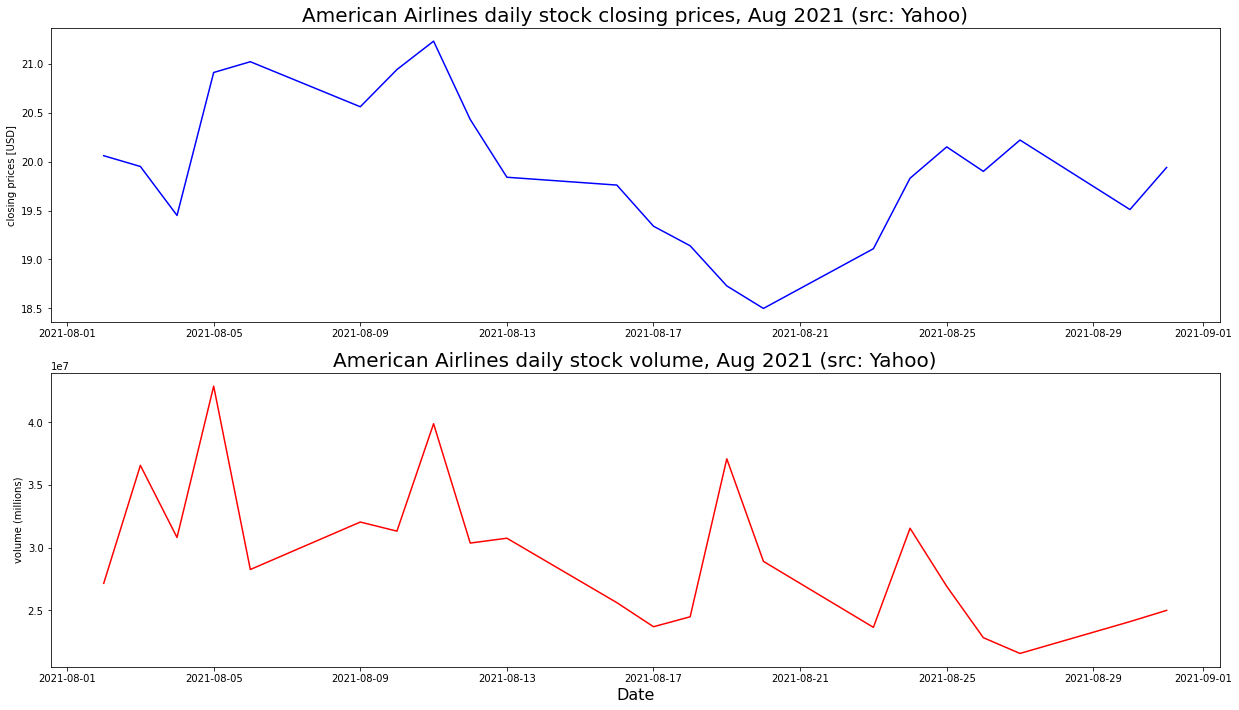

In [8]:
fig, (ax1, ax2) =plt.subplots(2, figsize=(17.5,10))
fig.tight_layout(pad=3.0)
ax1.plot(df4.index,df4["Close"],color="blue")
ax1.set_title("American Airlines daily stock closing prices, Aug 2021 (src: Yahoo)", size=20)
ax1.set(ylabel="closing prices [USD]")
ax2.plot(df4.index, df4["Volume"], color="red")
ax2.set_title("American Airlines daily stock volume, Aug 2021 (src: Yahoo)", size=20)
ax2.set(ylabel="volume (millions)")
plt.xlabel("Date",size=16)
plt.show()